<a href="https://colab.research.google.com/github/official-okello/DS_bootcamp_with_gomycode/blob/master/Credit_Card_Dataset_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

**Credit_Card_Dataset_Clustering**

Dataset description : This dataset was derived and simplified for learning purposes. It includes usage behaviour of about 9000 active credit card holders during 6 months period. This case requires to develop a customer segmentation to define marketing strategy.


---


Columns explanation :

-- CUST_ID: Identification of Credit Card holder (Categorical)


-- BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)


-- PURCHASES: Amount of purchases made from account


-- CASH_ADVANCE: Cash in advance given by the user


-- CREDIT_LIMIT: Limit of Credit Card for user


-- PAYMENTS: Amount of Payment done by user


---

Instructions

1. Import you data and perform basic data exploration phase


2. Perform the necessary data preparation steps ( Corrupted and missing values handling, data encoding, outliers handling ... )


3. Perform hierarchical clustering to identify the inherent groupings within your data. Then, plot the clusters. (use only 2 features. For example, try to cluster the customer base with respect to 'PURCHASES' and 'credit limit')


4. Perform partitional clustering using the K-means algorithm. Then, plot the clusters


5. Find the best k value and plot the clusters again.


6. Interpret the results

# EDA

In [ ]:
#@title Loading dataset

import pandas as pd
data = pd.read_csv('/content/Credit_card_dataset.csv')

In [ ]:
#@title Reading from the dataset
data.head()

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000


In [ ]:
#@title Shape of dataset
data.shape

(8950, 6)

In [ ]:
#@title Check uniques
data.nunique()

,0
CUST_ID,8950
BALANCE_FREQUENCY,43
PURCHASES,6203
PAYMENTS,8711
CREDIT_LIMIT,205
CASH_ADVANCE,4323


In [ ]:
#@title Basic info on data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            8950 non-null   object 
 1   BALANCE_FREQUENCY  8950 non-null   float64
 2   PURCHASES          8950 non-null   float64
 3   PAYMENTS           8950 non-null   float64
 4   CREDIT_LIMIT       8949 non-null   float64
 5   CASH_ADVANCE       8950 non-null   float64
dtypes: float64(5), object(1)
memory usage: 419.7+ KB


In [ ]:
#@title Descriptive stats
data.describe(include='all')

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
count,8950,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000
unique,8950,NaN,NaN,NaN,NaN,NaN
top,C19190,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.877271,1003.204834,1733.143852,4494.449450,978.871112
std,NaN,0.236904,2136.634782,2895.063757,3638.815725,2097.163877
min,NaN,0.000000,0.000000,0.000000,50.000000,0.000000
25%,NaN,0.888889,39.635000,383.276166,1600.000000,0.000000
50%,NaN,1.000000,361.280000,856.901546,3000.000000,0.000000
75%,NaN,1.000000,1110.130000,1901.134317,6500.000000,1113.821139


In [ ]:
#@title Checking for nulls
data.isnull().sum()

,0
CUST_ID,0
BALANCE_FREQUENCY,0
PURCHASES,0
PAYMENTS,0
CREDIT_LIMIT,1
CASH_ADVANCE,0


<Axes: >

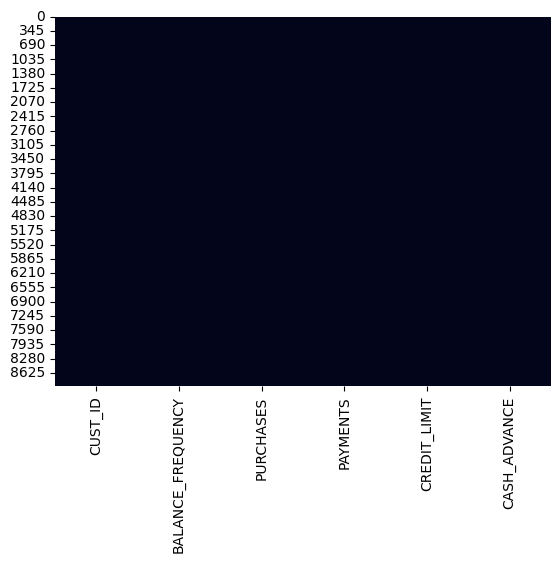

In [ ]:
#@title Visualize nulls
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data.isnull(), cbar=False)

In [ ]:
#@title Handle nulls
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median(), inplace=True)

<ipython-input-9-fd7859adbaf2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median(), inplace=True)


In [ ]:
#@title Check for duplicates
data.duplicated().sum()

np.int64(0)

In [ ]:
#@title Check Skewness for numerical features
numerical_features = data.select_dtypes(include=['number'])
numerical_features.skew() #absolute skew of beyond 1.5 indicating assymetry

,0
BALANCE_FREQUENCY,-2.023266
PURCHASES,8.144269
PAYMENTS,5.907620
CREDIT_LIMIT,1.522636
CASH_ADVANCE,5.166609


In [ ]:
#@title Kurtosis for numerical features
numerical_features.kurt() # greater than 0 meaning flatter tails

,0
BALANCE_FREQUENCY,3.092370
PURCHASES,111.388771
PAYMENTS,54.770736
CREDIT_LIMIT,2.837371
CASH_ADVANCE,52.899434


In [ ]:
#@title Correlation for numerical features
numerical_features.corr() # purchases and payments are overly correlated at 0.6

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
BALANCE_FREQUENCY,1.000000,0.133674,0.065008,0.095931,0.099388
PURCHASES,0.133674,1.000000,0.603264,0.356977,-0.051474
PAYMENTS,0.065008,0.603264,1.000000,0.421876,0.453238
CREDIT_LIMIT,0.095931,0.356977,0.421876,1.000000,0.303997
CASH_ADVANCE,0.099388,-0.051474,0.453238,0.303997,1.000000


<Axes: >

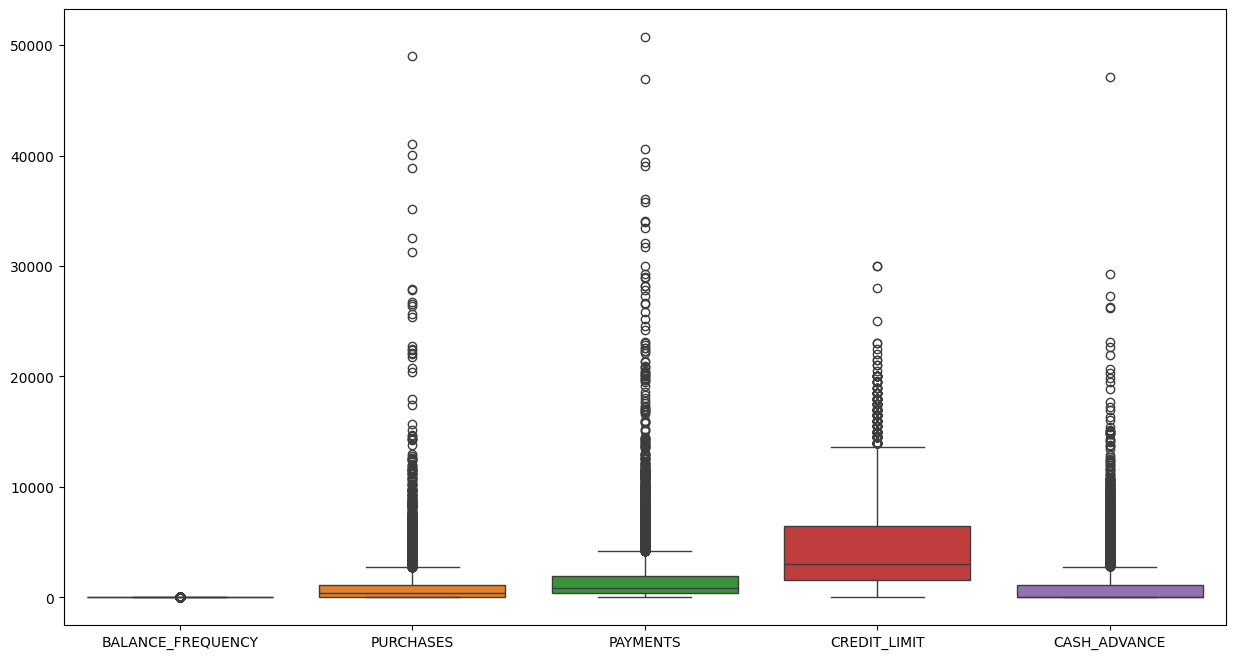

In [ ]:
#@title Plot outliers
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
sns.boxplot(data=data)

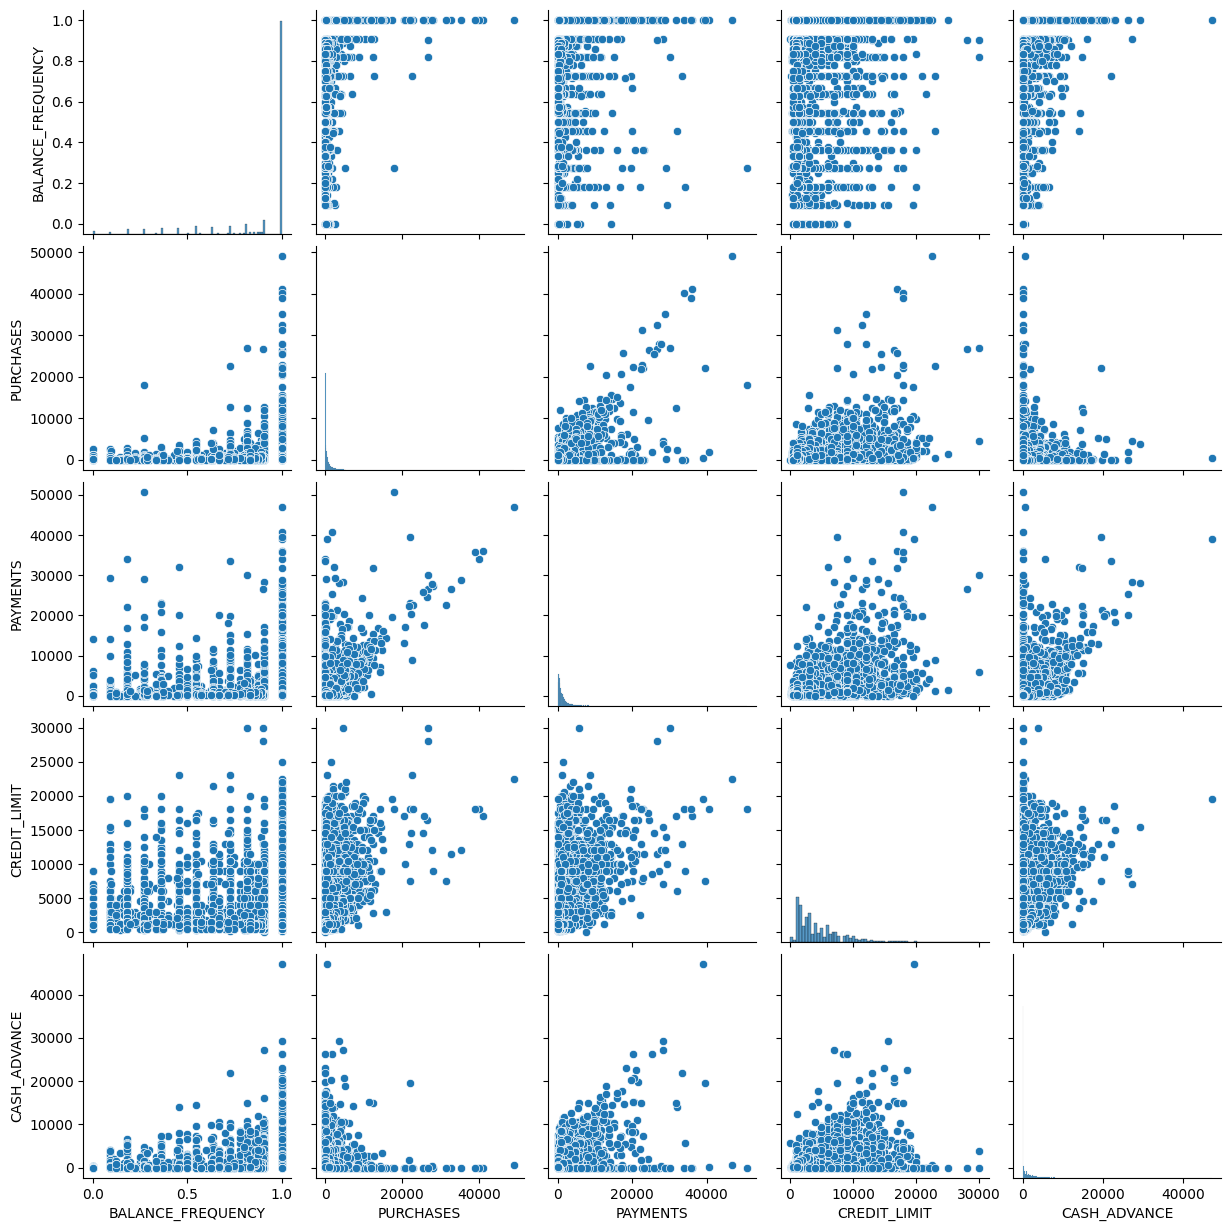

In [ ]:
#@title Pairplots for the features
sns.pairplot(data)

# Perform Hierarchical Clustering on the Dataset

In [ ]:
#@title Identify cluster data
cluster_data = data[['PURCHASES', 'CREDIT_LIMIT']]

In [ ]:
#@title Building a Agglomerative Model
from sklearn.cluster import AgglomerativeClustering
agglo_model = AgglomerativeClustering(n_clusters=5, linkage='ward')
agglo_model.fit(cluster_data)

AgglomerativeClustering(n_clusters=5)

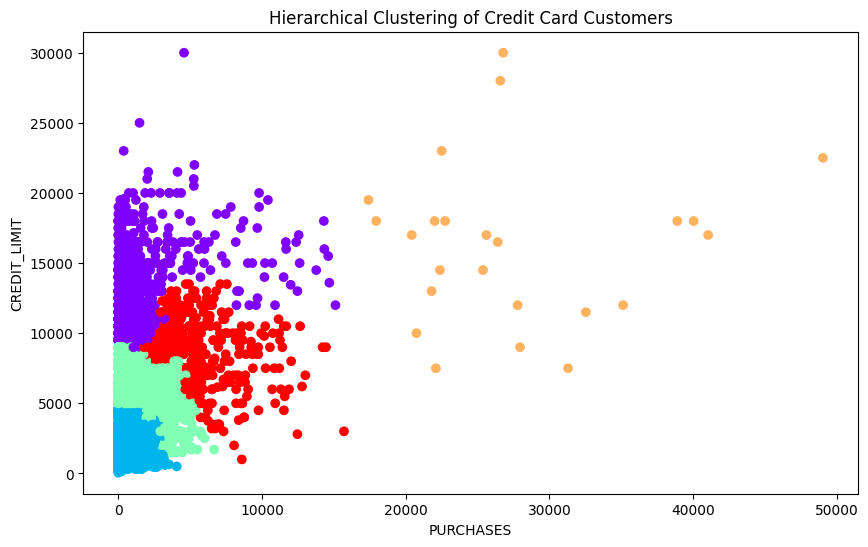

In [ ]:
#@title Plot the Hierarchical clusters
plt.figure(figsize=(10, 6))
plt.scatter(cluster_data['PURCHASES'], cluster_data['CREDIT_LIMIT'], c=agglo_model.labels_, cmap='rainbow')
plt.xlabel('PURCHASES')
plt.ylabel('CREDIT_LIMIT')
plt.title('Hierarchical Clustering of Credit Card Customers')
plt.show()

# Perform partitional clustering using the K-means algorithm then, plot the clusters

In [ ]:
#@title Build a KMeans algorithm
from sklearn.cluster import KMeans
k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(cluster_data)

KMeans(n_clusters=6, random_state=42)

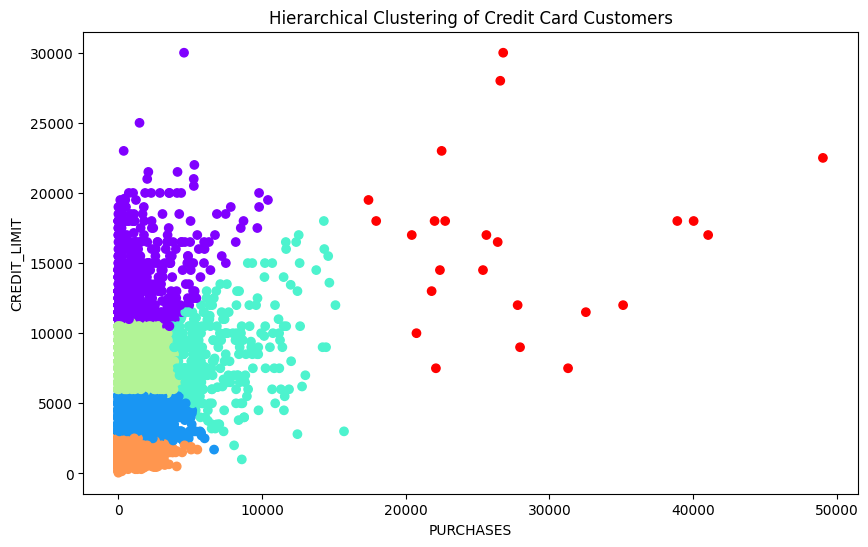

In [ ]:
#@title Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(cluster_data['PURCHASES'], cluster_data['CREDIT_LIMIT'], c=kmeans.labels_, cmap='rainbow')
plt.xlabel('PURCHASES')
plt.ylabel('CREDIT_LIMIT')
plt.title('Hierarchical Clustering of Credit Card Customers')
plt.show()

K = 1, WCSS = 159336569235.10
K = 2, WCSS = 76019572739.21
K = 3, WCSS = 53799442680.18
K = 4, WCSS = 39060578312.34
K = 5, WCSS = 33096187431.32
K = 6, WCSS = 25244321146.75
K = 7, WCSS = 22215640502.28
K = 8, WCSS = 18028999591.69
K = 9, WCSS = 16518578285.97
K = 10, WCSS = 15654119303.25


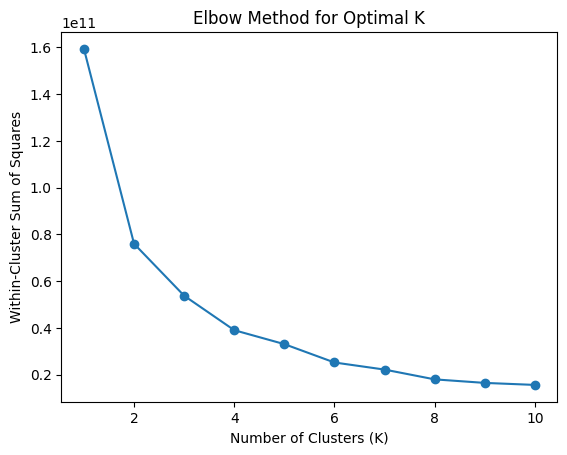

In [ ]:
#@title Finding the best value of K
# wcss -> Within-Cluster Sum of Squares
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_data)
    wcss.append(kmeans.inertia_)
    print(f"K = {k}, WCSS = {kmeans.inertia_:.2f}")
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares')
plt.title('Elbow Method for Optimal K')
plt.show()

# Interpretations

The optimal value of K for KMeans clustering was 2 according to the Elbow method.This value corresponds to Within-Cluster Sum of Squares of 76019572739.21.